In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
#from Seq2Seq import Seq2Seq
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
import torch.nn.functional as F
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, Callback
import torchvision

import io
import imageio
from ipywidgets import widgets, HBox

In [ ]:
np.random.seed(12)
class mydata(Dataset):
        def __init__(self, datalist):
            self.data = datalist
            np.random.seed(10)
        def __len__(self):
            return len(self.data)
        
        def __getitem__(self, idx):
            randint = np.random.randint(0,6)
            target = [randint]*10
            return self.data[idx], target[idx]

train_loader = DataLoader(mydata([1,2,3,4,5,6,7,8,9,10]), shuffle=True, 
                        batch_size=1)

lol = [1,2,3,4,5,6]
np.random.shuffle(lol)
print(lol)

for epoch in range(3):
    for x, target in train_loader:
        print(x,target)
    print("=============")
    
lol = [1*2,2*2,3*2,4*2,5*2,6*2]
np.random.shuffle(lol)
print(lol)

# slet herunder

In [57]:
import os
folder_dir_ch="./data/16bitdone"
chunks=sorted(os.listdir(folder_dir_ch))
final_list = []
chunklist=[]
seqlen=2 + 6
window=3
j=0
print("Loading data in to Main Memory (Only-Cloud)")
for chunk in chunks[1:]:
    file=torch.load(folder_dir_ch +"/" + chunk)
    for i in range(0,file.shape[0], window):
        if i<file.shape[0]-seqlen:
            chunklist.append(file[i:seqlen+i,:,:,:].transpose(0,1))
        else:
            break
print("\nDone")

Loading data in to Main Memory (Only-Cloud)

Done


In [84]:
class mydata(Dataset):
    def __init__(self, datalist, input_seq):
        self.data = datalist
        self.input_seq = input_seq
        # Setting a random seed to ensure that the lead-time will be the same across runs
        np.random.seed(10)
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        batch = self.data[idx]
        randint = np.random.randint(0,6)
        lead_time = torch.ones((1,self.input_seq+6,256,256))*randint
        final = torch.cat((batch,lead_time),0)
        input_ = final[:,0:self.input_seq,]
        target = final[0,self.input_seq+randint:self.input_seq+randint+1,64:192, 64:192]
        return input_.type(torch.float16), target.type(torch.float16), idx

In [85]:
train_loader = DataLoader(mydata(chunklist, 2), shuffle=True, batch_size = 4)

In [86]:
for x,y,i in train_loader:
    print(x.shape)
    print(y.shape)
    print(i)
    break

torch.Size([4, 4, 2, 256, 256])
torch.Size([4, 1, 128, 128])
tensor([15549, 20939, 13927, 13195])


In [89]:
x.dtype

torch.float16

In [56]:
lead_time = int(x[0,1,0].max())
firstinbatch = chunklist[i[0]]
real_target = firstinbatch[0, 2+lead_time, 64:192, 64:192]
target = y[0].squeeze()

torch.allclose(target.type(torch.uint8), real_target)

True

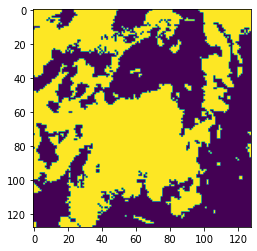

In [48]:
import matplotlib.pyplot as plt
plt.imshow(real_target)

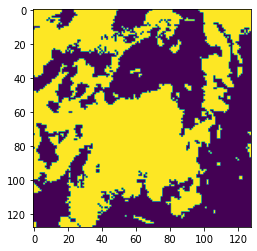

In [49]:
plt.imshow(target)

In [92]:
datatype = torch.uint8
x.type(datatype).dtype

torch.uint8